# Function optimization

In [1]:
%matplotlib inline

import numpy as np 
from matplotlib import pylab as plt
from seqmml import SeqUD, SMACOPT, GPEIOPT, TPEOPT

def plot_trajectory(xlim, ylim, func, clf, title):
    grid_num = 25
    xlist = np.linspace(xlim[0], xlim[1], grid_num)
    ylist = np.linspace(ylim[0], ylim[1], grid_num)
    X, Y = np.meshgrid(xlist, ylist)
    Z = np.zeros((grid_num, grid_num))
    for i, x1 in enumerate(xlist):
        for j, x2 in enumerate(ylist):
            Z[j, i] = func({"x1": x1, "x2": x2})

    cp = plt.contourf(X, Y, Z)
    plt.scatter(clf.logs.loc[:, ['x1']], 
                clf.logs.loc[:, ['x2']], color="red")
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])
    plt.colorbar(cp)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    
rand_seed = 2
max_runs = 100

### 1  Cliff-Shaped function

 $$
f_{1}\left(x_{1}, x_{2} \right) = \left(x_{1}, x_{2} \right) = \exp \left\{-\frac{1}{2} \frac {x_{1}^{2}}{100} \right\} - \frac{1}{2} \left(x_{2} + 0.03 x_{1}^{2} - 3 \right)^{2}, \\
 x_{1} \in [-20,20 ] , x_{2} \in [-10,5].
$$

In [2]:
def cliff(parameters):
    x1 = parameters['x1']
    x2 = parameters['x2']
    term1 = -0.5 * x1 ** 2 / 100
    term2 = -0.5 * (x2 + 0.03 * x1 ** 2 - 3) ** 2
    y = np.exp(term1 + term2)
    return  y

ParaSpace = {'x1': {'Type': 'continuous', 'Range': [-20,20], 'Wrapper': lambda x: x}, 
             'x2': {'Type': 'continuous', 'Range': [-10,5], 'Wrapper': lambda x: x}}

In [3]:
sequd_clf = SeqUD(ParaSpace, max_runs=max_runs, rand_seed=rand_seed, verbose=True)
sequd_clf.fmin(cliff)

tpe_clf = TPEOPT(ParaSpace, max_runs=max_runs, rand_seed=rand_seed, verbose=True)
tpe_clf.fmin(cliff)

smac_clf = SMACOPT(ParaSpace, max_runs=max_runs, rand_seed=rand_seed, verbose=True)
smac_clf.fmin(cliff)

gpei_clf = GPEIOPT(ParaSpace, max_runs=max_runs, rand_seed=rand_seed, verbose=True)
gpei_clf.fmin(cliff)

Stage 1 completed (20/100) with best score: 0.87563.
Stage 2 completed (34/100) with best score: 0.98313.
Stage 3 completed (49/100) with best score: 0.98313.
Stage 4 completed (63/100) with best score: 0.99604.
Stage 5 completed (77/100) with best score: 0.99760.
Stage 6 completed (92/100) with best score: 0.99978.
Maximum number of runs reached, stop!
SeqUD completed in 2.61 seconds.
The best score is: 0.99978.
The best configurations are:
x1                  : -0.1875
x2                  : 3.00781


TPE completed in 0.97 seconds.
The best score is: 0.98427.
The best configurations are:
x1                  : -1.35563
x2                  : 3.06036



SMAC completed in 25.53 seconds.
The best score is: 0.99647.
The best configurations are:
x1                  : -0.07603
x2                  : 2.9161



GPEI completed in 310.91 seconds.
The best score is: 1.00000.
The best configurations are:
x1                  : 0.01231
x2                  : 2.99772



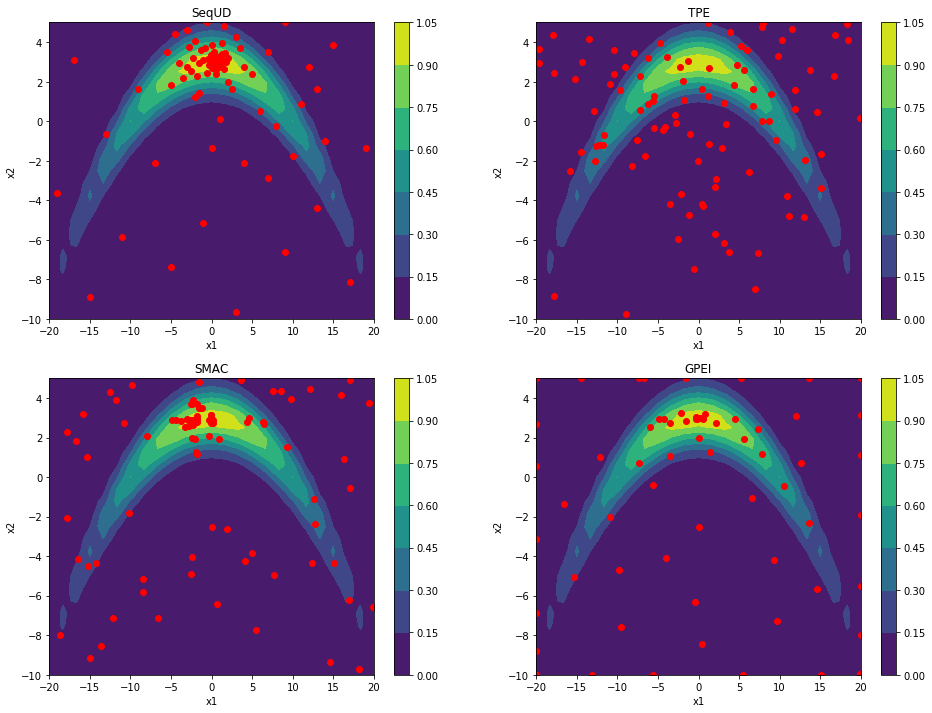

In [4]:
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
plot_trajectory([-20, 20], [-10, 5], cliff, sequd_clf, "SeqUD")

plt.subplot(2, 2, 2)
plot_trajectory([-20, 20], [-10, 5], cliff, tpe_clf, "TPE")

plt.subplot(2, 2, 3)
plot_trajectory([-20, 20], [-10, 5], cliff, smac_clf, "SMAC")

plt.subplot(2, 2, 4)
plot_trajectory([-20, 20], [-10, 5], cliff, gpei_clf, "GPEI")

### 2. Octopus-Shaped function

$$
f_{2}(x_{1}, x_{2})  = 2cos(10x)\sin(10y)+\sin(10xy), \quad x_{1}, x_{2} \in [0, 1].
$$

In [12]:
def octopus(parameters):
    x1 = parameters['x1']
    x2 = parameters['x2']
    y = 2 * np.cos(10 * x1) * np.sin(10 * x2) + np.sin(10 * x1 * x2)
    return  y

Level_Number = 20
ParaSpace = {'x1': {'Type': 'continuous', 'Range': [0,1], 'Wrapper': lambda x: x}, 
             'x2': {'Type': 'continuous', 'Range': [0,1], 'Wrapper': lambda x: x}}

In [13]:
sequd_clf = SeqUD(ParaSpace, max_runs=max_runs, rand_seed=rand_seed, verbose=True)
sequd_clf.fmin(octopus)

tpe_clf = TPEOPT(ParaSpace, max_runs=max_runs, rand_seed=rand_seed, verbose=True)
tpe_clf.fmin(octopus)

smac_clf = SMACOPT(ParaSpace, max_runs=max_runs, rand_seed=rand_seed, verbose=True)
smac_clf.fmin(octopus)

gpei_clf = GPEIOPT(ParaSpace, max_runs=max_runs, rand_seed=rand_seed, verbose=True)
gpei_clf.fmin(octopus)

Stage 1 completed (20/100) with best score: 2.69862.
Stage 2 completed (34/100) with best score: 2.69862.
Stage 3 completed (47/100) with best score: 2.96798.
Stage 4 completed (62/100) with best score: 2.96798.
Stage 5 completed (76/100) with best score: 2.98831.
Stage 6 completed (92/100) with best score: 2.99630.
Maximum number of runs reached, stop!
SeqUD completed in 2.59 seconds.
The best score is: 2.99630.
The best configurations are:
x1                  : 0.31719
x2                  : 0.47187


TPE completed in 1.26 seconds.
The best score is: 2.99282.
The best configurations are:
x1                  : 0.31813
x2                  : 0.47782


SMAC completed in 35.60 seconds.
The best score is: 2.98457.
The best configurations are:
x1                  : 0.3253
x2                  : 0.46709


GPEI completed in 505.80 seconds.
The best score is: 2.86171.
The best configurations are:
x1                  : 0.63237
x2                  : 0.17181


Note the **results of GPEI may be different when using different random seed**. 
Sometimes it can find the best location, and it may also be trapped into local optima jsut as in the current case. 

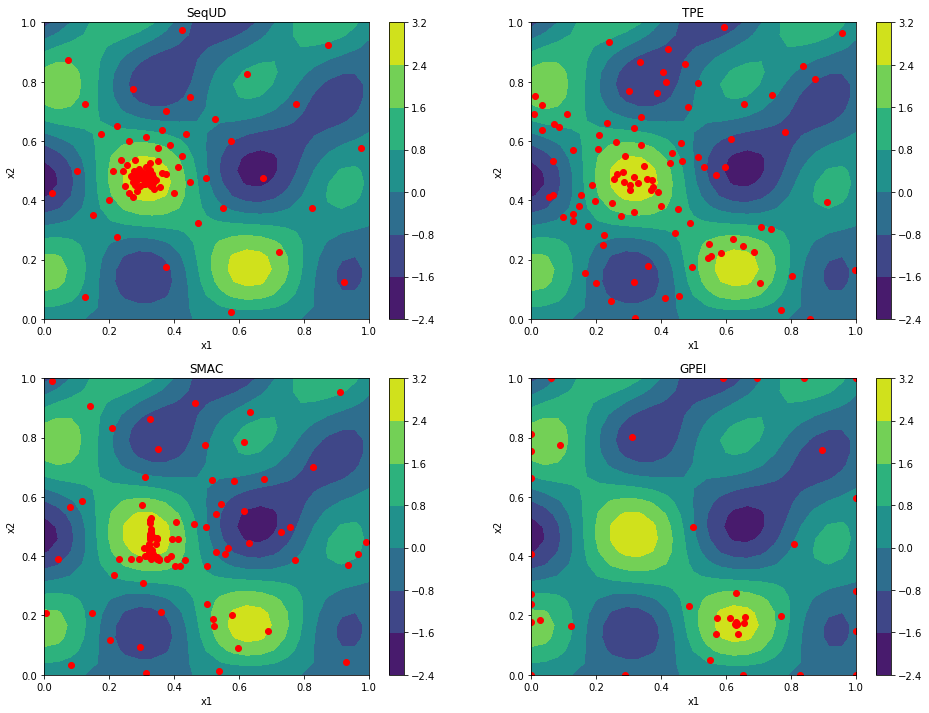

In [14]:
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
plot_trajectory([0, 1], [0, 1], octopus, sequd_clf, "SeqUD")

plt.subplot(2,2,2)
plot_trajectory([0, 1], [0, 1], octopus, tpe_clf, "TPE")

plt.subplot(2, 2, 3)
plot_trajectory([0, 1], [0, 1], octopus, smac_clf, "SMAC")

plt.subplot(2, 2, 4)
plot_trajectory([0, 1], [0, 1], octopus, gpei_clf, "GPEI")